## Implement Quasiparticle Hamiltonian on a IonQ simulator

In [1]:
import qiskit
import numpy as np
from qiskit.quantum_info import SparsePauliOp

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from typing import Dict


Load matrix elements for $^{18}O$

In [2]:
data_onebody=np.load('data/matrix_elements_h_eff_2body/one_body_nn_sd.npz')
keys=data_onebody['keys']
values=data_onebody['values']
n_qubits=6

t_onebody={}

for a,key in enumerate(keys):
    i,j=key
    t_onebody[(i,j)]=values[a]

print(t_onebody)


{(0, 0): -9.3151, (0, 1): 0.6897999999999996, (0, 2): -0.4062999999999996, (0, 3): -0.900781889989654, (0, 4): -1.9314456782406446, (0, 5): 0.6017349640876247, (1, 0): 0.6897999999999996, (1, 1): -8.8615, (1, 2): 0.8598999999999998, (1, 3): 0.900781889989654, (1, 4): 1.1336192497488327, (1, 5): -1.3995613925794368, (2, 0): -0.4062999999999996, (2, 1): 0.8598999999999998, (2, 2): -9.145, (2, 3): -0.900781889989654, (2, 4): -0.7347060355029268, (2, 5): 1.7984746068253425, (3, 0): -0.900781889989654, (3, 1): 0.900781889989654, (3, 2): -0.900781889989654, (3, 3): -8.107099999999999, (3, 4): -0.7177133829043456, (3, 5): 0.7177133829043456, (4, 0): -1.9314456782406446, (4, 1): 1.1336192497488327, (4, 2): -0.7347060355029268, (4, 3): -0.7177133829043456, (4, 4): 3.2251000000000003, (4, 5): 0.9008999999999998, (5, 0): 0.6017349640876247, (5, 1): -1.3995613925794368, (5, 2): 1.7984746068253425, (5, 3): 0.7177133829043456, (5, 4): 0.9008999999999998, (5, 5): 3.2251000000000003}


#### Build-up $H_Q$

In [3]:
def get_hamiltonian(t_onebody:Dict, n_sites:int):

    # List of Hamiltonian terms as 3-tuples containing
    # (1) the Pauli string,
    # (2) the qubit indices corresponding to the Pauli string,
    # (3) the coefficient.
    XX_tuples=[]
    YY_tuples=[]
    Z_tuples=[]
    I_tuples=[]
    for (i,j),t_val in t_onebody.items():
    
        if i==j:
            Z_tuples.append(("Z", [i], -0.5*t_val))
            I_tuples.append(('I',[i],0.5*t_val)) 
        else:
            XX_tuples.append( ("XX", [i, j], 0.25*t_val) )
            YY_tuples.append(("YY", [i, j], 0.25*t_val) )
            
    # We create the Hamiltonian as a SparsePauliOp, via the method
    # `from_sparse_list`, and multiply by the interaction term.
    hamiltonian = SparsePauliOp.from_sparse_list([*XX_tuples, *YY_tuples,*Z_tuples,*I_tuples], num_qubits=n_sites)
    return hamiltonian.simplify()



Get the manybody basis

In [4]:
import numpy as np
from qiskit.quantum_info import Statevector

n_sites=6
basis_states = [Statevector.from_label(np.binary_repr(i, width=n_sites)) for i in range(2**n_sites)]

bitstring_to_index = {np.binary_repr(i, width=n_sites): i for i in range(2**n_sites)}
index_to_bitstring = {i: np.binary_repr(i, width=n_sites) for i in range(2**n_sites)}

In [5]:
print(index_to_bitstring)

{0: '000000', 1: '000001', 2: '000010', 3: '000011', 4: '000100', 5: '000101', 6: '000110', 7: '000111', 8: '001000', 9: '001001', 10: '001010', 11: '001011', 12: '001100', 13: '001101', 14: '001110', 15: '001111', 16: '010000', 17: '010001', 18: '010010', 19: '010011', 20: '010100', 21: '010101', 22: '010110', 23: '010111', 24: '011000', 25: '011001', 26: '011010', 27: '011011', 28: '011100', 29: '011101', 30: '011110', 31: '011111', 32: '100000', 33: '100001', 34: '100010', 35: '100011', 36: '100100', 37: '100101', 38: '100110', 39: '100111', 40: '101000', 41: '101001', 42: '101010', 43: '101011', 44: '101100', 45: '101101', 46: '101110', 47: '101111', 48: '110000', 49: '110001', 50: '110010', 51: '110011', 52: '110100', 53: '110101', 54: '110110', 55: '110111', 56: '111000', 57: '111001', 58: '111010', 59: '111011', 60: '111100', 61: '111101', 62: '111110', 63: '111111'}


In [6]:
hamiltonian_q=get_hamiltonian(t_onebody=t_onebody,n_sites=6)

print(hamiltonian_q[0],hamiltonian_q[15])

print(hamiltonian_q.to_matrix(sparse=True))

index=1
effective_index=63-2**index

print(hamiltonian_q.to_matrix(sparse=True)[effective_index,effective_index])


SparsePauliOp(['IIIIXX'],
              coeffs=[0.3449+0.j]) SparsePauliOp(['IIIIYY'],
              coeffs=[0.3449+0.j])
  (0, 0)	(-2.220446049250313e-15+0j)
  (0, 3)	0j
  (0, 5)	0j
  (0, 6)	0j
  (0, 9)	0j
  (0, 10)	0j
  (0, 12)	0j
  (0, 17)	0j
  (0, 18)	0j
  (0, 20)	0j
  (0, 24)	0j
  (0, 33)	0j
  (0, 34)	0j
  (0, 36)	0j
  (0, 40)	0j
  (0, 48)	0j
  (1, 1)	(-9.315100000000001+0j)
  (1, 2)	(0.6897999999999996+0j)
  (1, 4)	(-0.4062999999999996+0j)
  (1, 7)	0j
  (1, 8)	(-0.900781889989654+0j)
  (1, 11)	0j
  (1, 13)	0j
  (1, 16)	(-1.9314456782406446+0j)
  (1, 19)	0j
  :	:
  (62, 44)	0j
  (62, 47)	(-1.9314456782406446+0j)
  (62, 50)	0j
  (62, 52)	0j
  (62, 55)	(-0.900781889989654+0j)
  (62, 56)	0j
  (62, 59)	(-0.4062999999999996+0j)
  (62, 61)	(0.6897999999999996+0j)
  (62, 62)	(-19.663399999999996+0j)
  (63, 15)	0j
  (63, 23)	0j
  (63, 27)	0j
  (63, 29)	0j
  (63, 30)	0j
  (63, 39)	0j
  (63, 43)	0j
  (63, 45)	0j
  (63, 46)	0j
  (63, 51)	0j
  (63, 53)	0j
  (63, 54)	0j
  (63, 57)	0j
  (63, 58

#### Qiskit has the sick problem that the occupation value 1 becomes 0 (they define $S_z$ in the opposite way). Therefore, to select the Hamiltonian fixed in the one quasiparticle many-body basis we need to consider the conversion to the full bitstrig basis 

bitstring_index= 63- $2^{sp \; index}$

In [7]:
from scipy.sparse import csr_matrix



for i in range(1,n_qubits+1):
    for j in range(1,n_qubits+1):
        
        print(f'i={(i-1)},j={(j-1)} ->{csr_matrix(hamiltonian_q.to_matrix())[2**(i-1),2**(j-1)]} \n')
        
### We got exactly the same Hamiltonian!

i=0,j=0 ->(-9.315100000000003+0j) 

i=0,j=1 ->(0.6897999999999996+0j) 

i=0,j=2 ->(-0.4062999999999996+0j) 

i=0,j=3 ->(-0.900781889989654+0j) 

i=0,j=4 ->(-1.9314456782406446+0j) 

i=0,j=5 ->(0.6017349640876247+0j) 

i=1,j=0 ->(0.6897999999999996+0j) 

i=1,j=1 ->(-8.861500000000001+0j) 

i=1,j=2 ->(0.8598999999999998+0j) 

i=1,j=3 ->(0.900781889989654+0j) 

i=1,j=4 ->(1.1336192497488327+0j) 

i=1,j=5 ->(-1.3995613925794368+0j) 

i=2,j=0 ->(-0.4062999999999996+0j) 

i=2,j=1 ->(0.8598999999999998+0j) 

i=2,j=2 ->(-9.145000000000001+0j) 

i=2,j=3 ->(-0.900781889989654+0j) 

i=2,j=4 ->(-0.7347060355029268+0j) 

i=2,j=5 ->(1.7984746068253425+0j) 

i=3,j=0 ->(-0.900781889989654+0j) 

i=3,j=1 ->(0.900781889989654+0j) 

i=3,j=2 ->(-0.900781889989654+0j) 

i=3,j=3 ->(-8.1071+0j) 

i=3,j=4 ->(-0.7177133829043456+0j) 

i=3,j=5 ->(0.7177133829043456+0j) 

i=4,j=0 ->(-1.9314456782406446+0j) 

i=4,j=1 ->(1.1336192497488327+0j) 

i=4,j=2 ->(-0.7347060355029268+0j) 

i=4,j=3 ->(-0.7177133829043456+0j

#### Build-up the driver Hamiltonian

In [8]:
coupling_term=-9.3151
Z_tuples=[("Z", [0], -0.5*coupling_term)]
I_tuples=[('I',[0],0.5*coupling_term)]

        
# We create the Hamiltonian as a SparsePauliOp, via the method
# `from_sparse_list`, and multiply by the interaction term.
hamiltonian_driver = SparsePauliOp.from_sparse_list([*Z_tuples,*I_tuples], num_qubits=n_sites)


print(hamiltonian_driver)

SparsePauliOp(['IIIIIZ', 'IIIIII'],
              coeffs=[ 4.65755+0.j, -4.65755+0.j])


In [9]:
from scipy.sparse import csr_matrix



for i in range(1,n_qubits+1):
    for j in range(1,n_qubits+1):
        
        print(f'i={(i-1)},j={(j-1)} ->{csr_matrix(hamiltonian_driver.to_matrix())[2**(i-1),2**(j-1)]} \n')
        

i=0,j=0 ->(-9.3151+0j) 

i=0,j=1 ->0j 

i=0,j=2 ->0j 

i=0,j=3 ->0j 

i=0,j=4 ->0j 

i=0,j=5 ->0j 

i=1,j=0 ->0j 

i=1,j=1 ->0j 

i=1,j=2 ->0j 

i=1,j=3 ->0j 

i=1,j=4 ->0j 

i=1,j=5 ->0j 

i=2,j=0 ->0j 

i=2,j=1 ->0j 

i=2,j=2 ->0j 

i=2,j=3 ->0j 

i=2,j=4 ->0j 

i=2,j=5 ->0j 

i=3,j=0 ->0j 

i=3,j=1 ->0j 

i=3,j=2 ->0j 

i=3,j=3 ->0j 

i=3,j=4 ->0j 

i=3,j=5 ->0j 

i=4,j=0 ->0j 

i=4,j=1 ->0j 

i=4,j=2 ->0j 

i=4,j=3 ->0j 

i=4,j=4 ->0j 

i=4,j=5 ->0j 

i=5,j=0 ->0j 

i=5,j=1 ->0j 

i=5,j=2 ->0j 

i=5,j=3 ->0j 

i=5,j=4 ->0j 

i=5,j=5 ->0j 



#### Define the Parameter Hamiltonian $H(s)=s H_Q + (1-s) H_D$

In [10]:
from qiskit.circuit import Parameter

s = Parameter("s")

hamiltonian_s = s * hamiltonian_q + (1 - s) * hamiltonian_driver



In [11]:
dt=0.1
hamiltonian_eval = hamiltonian_s.assign_parameters({s: dt})


In [12]:
from qiskit.quantum_info import  commutator


# Define the total particle number operator N
z_op = [("Z", [i], -0.5) for i in range(n_sites)]
identity=[("I", [i], 0.5) for i in range(n_sites)]
n_operator=SparsePauliOp.from_sparse_list([*z_op,], num_qubits=n_sites)

# Compute the commutator [H, N]
commutator_result = commutator(hamiltonian_eval, n_operator).simplify()

print(commutator_result)

SparsePauliOp(['IIIIII'],
              coeffs=[0j])


#### Let's perform the SUZUKI-TROTTER

In [13]:
from qiskit.synthesis import SuzukiTrotter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import transpile
from qiskit.quantum_info import Statevector
second_order_formula = SuzukiTrotter(order=1)  # if not passed, order defaults to 2
trotter_step_second_order = PauliEvolutionGate(hamiltonian_eval, dt, synthesis=second_order_formula)
circuit = QuantumCircuit(hamiltonian_eval.num_qubits)
circuit.append(trotter_step_second_order, range(hamiltonian_eval.num_qubits))
#circuit = circuit.decompose(reps=2)
circuit_opt=circuit
#circuit_opt = transpile(circuit, optimization_level=1)

#final_state=Statevector(circuit_opt)

initial_state=QuantumCircuit(hamiltonian_eval.num_qubits)
initial_state.x([0])

print(Statevector(initial_state).data)

initial_state.append(circuit_opt,circuit_opt.qubits)
final_state=Statevector(initial_state)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [ ]:
#### full time evolution

In [14]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.synthesis import SuzukiTrotter
from qiskit.transpiler import CouplingMap



In [15]:

#final_state=Statevector(circuit_opt)
time_steps=100
tf=10
time=np.linspace(0,tf,time_steps)
dt=tf/time_steps
initial_state=QuantumCircuit(hamiltonian_eval.num_qubits)
initial_state.x([0])

for n,t in enumerate(time):
    hamiltonian_t=(1-t/tf)*hamiltonian_driver+(t/tf)*hamiltonian_q
    exp_H_t=PauliEvolutionGate(hamiltonian_t,time=dt,synthesis=SuzukiTrotter(order=1))
    initial_state.append(exp_H_t,range(hamiltonian_q.num_qubits))
initial_state=transpile(initial_state, optimization_level=1)
final_state=Statevector(initial_state)

In [16]:

print(
    f"""
Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: {initial_state.depth()}
             Gate count: {len(initial_state)}
    Nonlocal gate count: {initial_state.num_nonlocal_gates()}
         Gate breakdown: {", ".join([f"{k.upper()}: {v}" for k, v in initial_state.count_ops().items()])}

"""
)

print(
    f"""
Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: {circuit_opt.depth()}
             Gate count: {len(circuit_opt)}
    Nonlocal gate count: {circuit_opt.num_nonlocal_gates()}
         Gate breakdown: {", ".join([f"{k.upper()}: {v}" for k, v in circuit_opt.count_ops().items()])}

"""
)


# And finall
%matplotlib inline
#initial_state.draw("text")


Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: 1291
             Gate count: 3565
    Nonlocal gate count: 2970
         Gate breakdown: RXX: 1485, RYY: 1485, RZ: 497, U1: 97, U3: 1



Trotter step with Suzuki Trotter (1nd order)
--------------------------------------------

                  Depth: 1
             Gate count: 1
    Nonlocal gate count: 1
         Gate breakdown: PAULIEVOLUTION: 1




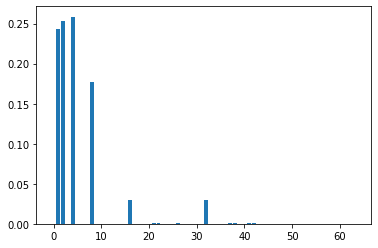

(64,)
(64,)
(64,)
(64,)
(64,)
(64,)


In [17]:
import matplotlib.pyplot as plt



prob=final_state.probabilities()

plt.bar(np.arange(prob.shape[0]),prob)
plt.show()

# convert into the single particle state
single_particle_vector=np.zeros(n_sites,dtype=np.complex128)

for a in range(n_sites):
    a_mb=2**(a)
    print(final_state.data.shape)
    single_particle_vector[a]=prob[a_mb]

In [18]:
print(np.sum(single_particle_vector))
print(np.linalg.norm(final_state.data))

(0.9932573306645412+0j)
0.9999999999999959


#### What if we add noise?

In [19]:
from qiskit_ionq import IonQProvider
provider = IonQProvider()

print(provider.backends())

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [ ]:
import os

my_api_key=os.getenv("9drU8TC3eyuoFsrcPCp815h0Z5tP3v5O")

provider = IonQProvider()
simulator_backend = provider.get_backend("simulator")
simulator_backend.set_options(noise_model="aria-1")

# Create a basic Bell State circuit:


job = simulator_backend.run(initial_state, shots=10000)

# Print the counts
print(job.get_counts())

IonQCredentialsError: IonQCredentialsError('Credentials `token` may not be None!')

#### Writing down the Hamiltonian using RXX, RYY and RZ (an alternative that can be not considered here in qiskit)

In [203]:
def exp_hamiltonian_q(qc,t_onebody,time,n_sites):
    for a in range(n_sites):
        for b in range(a,n_sites):
            if a!=b:
                value=time*t_onebody[a,b]
                qc.rxx(value,a,b)
                
            if a==b:
                value=time*t_onebody[a,b]
                qc.p(value,a)

    for a in range(n_sites):
        for b in range(a,n_sites):
            if a!=b:
                value=time*t_onebody[a,b]
                qc.ryy(value,a,b)
                

def exp_hamiltonian_driving(qc,coupling_term,index,time,n_sites):
    value=time*coupling_term
    qc.p(value,index)






In [204]:
from qiskit import QuantumCircuit

# Create a 6-qubit quantum circuit
qc = QuantumCircuit(6)

# Apply an X-gate to the first qubit to set it to |1⟩
qc.x([0])

# At this point, the state is [1, 0, 0, 0, 0, 0] (i.e., |100000⟩) the initial state of the QA protocol

# Optionally, you can print the circuit
print(qc.draw())

tf=10
time=np.linspace(0,tf,100)

for t in time:
    
    exp_hamiltonian_driving(qc,coupling_term=coupling_term,index=0,time=1-t/tf,n_sites=n_sites)
    exp_hamiltonian_q(qc,t_onebody=t_onebody,time=t/tf,n_sites=n_sites)
#qc=qc.decompose(reps=2)    
qc_opt=transpile(qc, optimization_level=3)
    

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          


In [ ]:
qc.draw('text')

In [206]:
qc.draw()
print(
    f"""
                  Depth: {qc.depth()}
             Gate count: {len(qc)}
    Nonlocal gate count: {qc.num_nonlocal_gates()}
         Gate breakdown: {", ".join([f"{k.upper()}: {v}" for k, v in qc.count_ops().items()])}

"""
)


                  Depth: 1305
             Gate count: 3701
    Nonlocal gate count: 3000
         Gate breakdown: RXX: 1500, RYY: 1500, P: 700, X: 1




In [207]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np
shots=1000
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(qc)
results_statevector = job_statevector.result()#.get_counts(0)

final_state=Statevector(qc)

/opt/anaconda3/envs/qs-estimation_env/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


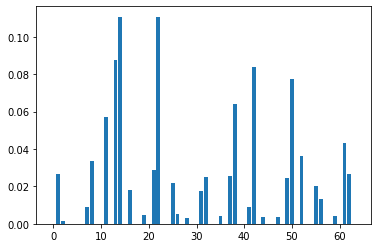

In [208]:
import matplotlib.pyplot as plt
prob=np.conjugate(final_state.data)*final_state.data

plt.bar(np.arange(prob.shape[0]),prob)
plt.show()

# convert into the single particle state
single_particle_vector=np.zeros(n_sites,dtype=np.complex128)

for a in range(n_sites):
    a_mb=2**a
    single_particle_vector[a]=final_state.data[a_mb]



In [209]:
print(np.linalg.norm(single_particle_vector))
print(np.linalg.norm(final_state.data))

0.32342941816803605
1.0000000000000078
